<a href="https://colab.research.google.com/github/zainmorshed/Classifying-Images-CNN/blob/main/Zain_Morshed_CNN_Classifying_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Follow along in navigating the world of image classification, unraveling the intricacies of CIFAR-10 with the power of Convolutional Neural Networks. Join me on this exciting adventure, and witness the transformative impact of deep learning on image recognition.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 10s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

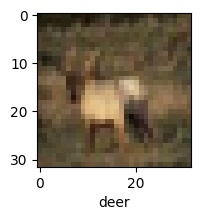

In [ ]:
plot_sample(X_train, y_train, 3)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [ ]:
ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 159s 101ms/step - loss: 1.8090 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 161s 103ms/step - loss: 1.6217 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 183s 117ms/step - loss: 1.5411 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.4810 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4316 - accuracy: 0.4980


In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 11s 35ms/step - loss: 1.5288 - accuracy: 0.4549


[1.5288279056549072, 0.45489999651908875]

Using an Artificial Neural Network was not very good. We can improve this by using a Convolutional Nerual Network instead as this will allow us to use filters to detect local patterns such as edges, textures, and simple shapes.

In [ ]:
cnn = keras.Sequential([
    # cnn
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [ ]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.5176 - accuracy: 0.4527
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1960 - accuracy: 0.5779
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0656 - accuracy: 0.6240
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9853 - accuracy: 0.6549
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9308 - accuracy: 0.6764
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8860 - accuracy: 0.6897
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8485 - accuracy: 0.7010
Epoch 8/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8120 - accuracy: 0.7155
Epoch 9/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7786 - accuracy: 0.7262
Epoch 10/10
1563/1563 [==============================] - 52s 34m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9982 - accuracy: 0.6654


[0.9982367157936096, 0.6654000282287598]

Our convolutional neural network performs with 66.54% accuracy. Although this is not perfect, it is still relatively good as we see in most cases it is still able to classify the different images correctly.

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

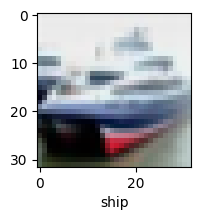

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[3.52771254e-04, 6.59140132e-05, 3.16854492e-02, 5.45717835e-01,
        2.23662035e-04, 4.10094023e-01, 6.30054856e-03, 6.34130440e-04,
        4.85650636e-03, 6.91983514e-05],
       [8.57128296e-04, 8.56368057e-03, 8.98692292e-07, 1.33108442e-05,
        8.53867186e-06, 2.53269741e-06, 4.21063220e-07, 8.00972799e-08,
        9.90012825e-01, 5.40680951e-04],
       [9.14130434e-02, 1.60252869e-01, 1.74601451e-02, 1.10565946e-01,
        1.74418762e-02, 1.04523906e-02, 6.54857839e-03, 3.15216719e-03,
        5.27030289e-01, 5.56825884e-02],
       [4.30808395e-01, 2.73148064e-03, 3.39553833e-01, 7.90086167e-04,
        4.94898371e-02, 9.42260976e-06, 1.48120476e-03, 1.26644809e-04,
        1.74936831e-01, 7.21223987e-05],
       [7.99872907e-07, 1.13804890e-05, 2.03153808e-02, 4.46290374e-02,
        1.34046808e-01, 1.29164930e-03, 7.99690723e-01, 4.74832802e-07,
        1.35587898e-05, 2.74145542e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Display image (actual value)


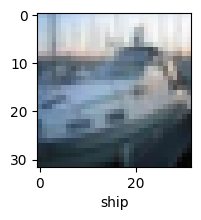

In [ ]:
plot_sample(X_test, y_test, 2)

Our model predicts (target value):

In [ ]:
classes[y_classes[2]]

'ship'